# Regresión Lineal Simple en Python
## El Paquete statsmodel para Regresión Lineal

In [73]:
import pandas as pd
import numpy as np

In [74]:
datas = pd.read_csv("../../ReposCurso/python-ml-course/datasets/ads/Advertising.csv")

In [75]:
datas.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [76]:
import statsmodels.formula.api as smf

In [77]:
# Para ventas en función de anuncios en tv
lm = smf.ols(formula="Sales~TV", data = datas).fit()  
# lm = lineal regression
# fit es para calcular la recta que mejor se ajusta usando la tecnica de miniizar los cuadrados de los errores.
lm

In [78]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería:
Sales = 7.032594 + 0.047537 * TV

In [79]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [80]:
# Como los valores son muy pequeños, los parametros son significativos

In [81]:
lm.rsquared

0.611875050850071

In [82]:
lm2.rsquared_adj

0.6422399150864777

In [83]:
lm.summary()
# Prob(F-statistic) es muy pequeño, por lo tanto los datos son muy buenos apra hacer predicciones.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.47e-42
Time:                        18:42:57   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# Haremos una predicción de ventas
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
# Como solo necesitamos el dato de TV de entrada, generamos un Dataframe con la columna TV como única columna.
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [85]:
import matplotlib.pyplot as plt

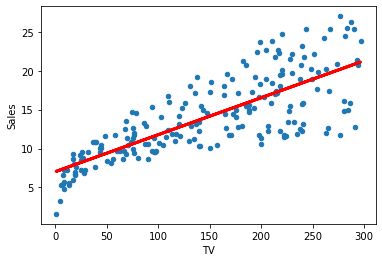

In [86]:
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y = "Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth = 3)

In [87]:
data["sales_pred"] = 7.032594 + 0.047537 * data["TV"]

In [88]:
data["RSE"] = (data["Sales"] - data["sales_pred"])**2

In [89]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [90]:
RSE = np.sqrt(SSD / (len(data) - 2))
RSE # RSE = Desviación estandar de los residuos

3.258656369238098

In [91]:
sales_m = np.mean(data["Sales"])
sales_m

14.022500000000003

In [92]:
error = RSE / sales_m # Error promedio
error

0.2323876890168014

In [93]:
# Por lo tanto hay un 23% de los datos que no quedan explicados

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

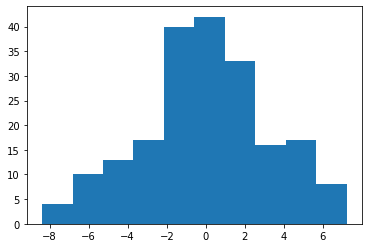

In [94]:
plt.hist((data["Sales"] - data["sales_pred"]))

 * Queda una distribución normal de media 0 y Desviación Estandar de 3.25, por lo tanto se cumplen las hipótesis.
 * Ya que el 23% de los datos no se pueden explicar, quizá sea bueno utilizar las otras columnas de radio y periódico.
 * Por esto generaremos una regresión lineal múltiple.

# Regresión Lineal Múltiple en Python
## El Paquete Statsmodel para Regresión Múltiple

Podríamos generar 7 modelos lineales diferentes:
* Sales ~ TV
* Sales ~ Newspaper
* Sales ~ Radio
* Sales ~ TV + Newspaper
* Sales ~ TV + Radio
* Sales ~ Newspaper + Radio
* Sales ~ TV + Newspaper + Radio

Hay dos enfoques para seleccionar variables predictoras:
* Empezar con un modelo vacío para ir añadiendo variables predictoras.
* Empezar con un modelo con todas las variables predictoras e ir quitando las que no se necesitan.

### Modelo con TV + Newspaper

In [95]:
# Añadir el Newspaper al modelo existente
lm2 = smf.ols(formula = "Sales ~ TV + Newspaper", data = datas).fit()
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [96]:
# Comprobamos los pvalues, para ver si son pequeños
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

sales = 5.774948 + 0.046901 * TV + 0.044219 * Newspaper

In [97]:
lm2.rsquared

0.6458354938293273

Agregando los datos de Newspaper subimos el rsquared de 0.6118 a 0.645

In [99]:
lm2.rsquared_adj

0.6422399150864777

El rsquared_adj se mantiene

In [103]:
sales_pred = lm2.predict(data[["TV", "Newspaper"]])
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [106]:
SSD = sum((data["Sales"] - sales_pred)**2)
SSD

1918.5618118968262

In [108]:
RSE = np.sqrt(SSD / (len(data) - 3))   # Va un 3 porque son 2 variables predictoras - 1 ( -2 -1 = -3)
RSE

3.1207198602528843

In [109]:
error = RSE / sales_m
error

0.22255089037282108

El error solo bajó de 0.232 a 0.222

In [111]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           3.95e-45
Time:                        18:50:16   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* El Prob(F-statistic) bajó de 1.47e-42 a 3.95e-45
* El (Adj. R-squared) subió de 0.610 a 0.642
* Por lo tanto este modelo es mejor que con solo una variable, pero no cambia sustancialmente.

### Ahora haremos el modelo con TV + Radio

In [112]:
# Añadir la Radio al modelo existente
lm3 = smf.ols(formula = "Sales ~ TV + Radio", data = datas).fit()
lm3.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [113]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           4.83e-98
Time:                        18:54:09   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* El Prob(F-statistic) bajó de 1.47e-42 a 4.83e-98
* El (Adj. R-squared) subió de 0.610 a 0.896
* Por lo tanto esta combinación parece aportar al modelo.

In [115]:
sales_pred = lm3.predict(data[["TV", "Radio"]])
sales_pred

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

In [116]:
SSD = sum((data["Sales"] - sales_pred)**2)
SSD

556.9139800676184

In [117]:
RSE = np.sqrt(SSD / (len(data) - 3))   # Va un 3 porque son 2 variables predictoras - 1 ( -2 -1 = -3)
RSE

1.681360912508001

In [118]:
error = RSE / sales_m
error

0.11990450436855059

El error bajó de un 23.2% a un 11.9%

Por lo tanto TV y Radio explica mejor el modelo que TV solo y TV + Newspaper

### Modelo con TV + Newspaper + Radio

In [120]:
# Añadir el Newspaper al modelo existente
lm4 = smf.ols(formula = "Sales ~ TV + Radio + Newspaper", data = datas).fit()
lm4.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [121]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.58e-96
Time:                        19:02:30   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El pvalor (P>|t|) que acompaña a Newspaper es casi 1 (0.860), por lo que no ayudaría al modelo

In [122]:
sales_pred = lm4.predict(data[["TV", "Radio", "Newspaper"]])
sales_pred

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
         ...    
195     5.370342
196     8.165312
197    12.785921
198    23.767321
199    15.173196
Length: 200, dtype: float64

In [125]:
SSD = sum((data["Sales"] - sales_pred)**2)
SSD

556.8252629021871

In [126]:
RSE = np.sqrt(SSD / (len(data) - 4))   # Va un 4 porque son 3 variables predictoras - 1 ( -3 -1 = -4)
RSE

1.6855103734147439

In [127]:
error = RSE / sales_m
error

0.12020041885646236

Con un 12% de error se podría asumir incluso que invertir en periódico estaría restando ventas